# Call and response: your first Bing Image Search query in Python

The Bing Image Search API provides an experience similar to Bing.com/Images by letting you send a user search query to Bing and get back a list of relevant images.

This walkthrough demonstrates a simple example of calling into the Bing Image Search API and post-processing the resulting JSON object. Please refer to the [Bing Image Search documentation](https://docs.microsoft.com/en-us/rest/api/cognitiveservices/bing-images-api-v7-reference) for more details on the REST APIs.  

You can run this example as a Jupyter notebook on [MyBinder](https://mybinder.org) by clicking on the launch Binder badge: 

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/Microsoft/cognitive-services-notebooks/master?filepath=BingImageSearchAPI.ipynb)

## Prerequisites

You must have a [Cognitive Services API account](https://docs.microsoft.com/azure/cognitive-services/cognitive-services-apis-create-account) with **Bing Search APIs**. The [free trial](https://azure.microsoft.com/try/cognitive-services/?api=bing-web-search-api) is sufficient for this quickstart. You need the access key provided when you activate your free trial, or you may use a paid subscription key from your Azure dashboard.

## Running the walkthrough
To continue with the walkthrough, please set `subscriptionKey` below to your API key for the Bing API service.

In [1]:
subscription_key = None
assert subscription_key

Next, please verify that the `search_url` endpoint is correct. At this writing, only one endpoint is used for Bing search APIs.  In the future, regional endpoints may be available.  If you encounter unexpected authorization errors, double-check this value against the endpoint for your Bing search instance in your Azure dashboard.

In [2]:
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"

We will now search Bing for images of puppies!

In [3]:
search_term = "puppies"

The following block uses the `requests` library in Python to call out to the Bing seach APIs and return the results as a JSON object. Observe that we pass in the API key via the `headers` dictionary and the search term via the `params` dictionary. To see the full list of options that can be used to filter search results, please see the [REST API](https://docs.microsoft.com/en-us/rest/api/cognitiveservices/bing-images-api-v7-reference) documentation.

In [4]:
import requests

headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()

The `search_results` object contains the actual images along with rich metadata such as related items. For example, we can extract the thumbnail URLS for the first 16 results using the following line of code.

In [5]:
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:16]]

Then, we can use the `PIL` library to download the thumbnail images and the `matplotlib` library to render them on a $4 \times 4$ grid.

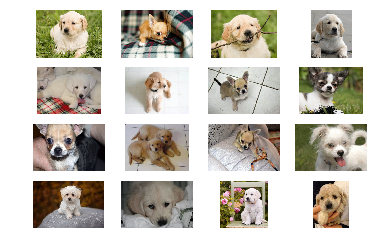

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        image_data = requests.get(thumbnail_urls[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")

## Next steps

> [!div class="nextstepaction"]
> [Bing Image Search single-page app tutorial](../tutorial-bing-image-search-single-page-app.md)

## See also 

[Bing Image Search overview](../overview.md)  
[Try it](https://azure.microsoft.com/services/cognitive-services/bing-image-search-api/)  
[Get a free trial access key](https://azure.microsoft.com/try/cognitive-services/?api=bing-image-search-api)  
[Bing Image Search API reference](https://docs.microsoft.com/rest/api/cognitiveservices/bing-images-api-v7-reference)